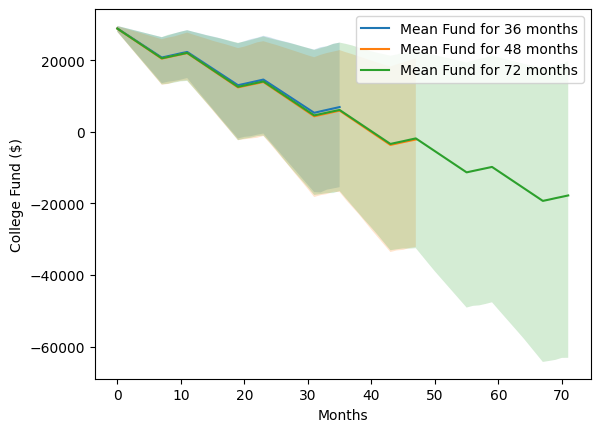

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def monte_carlo_simulation(time_horizon, simulations=1000):
    # Initialize Parameters
    starting_savings = 30000  # Starting amount
    monthly_savings = 1000     # Monthly savings
    monthly_stipend = 300     # Monthly stipend for the kid

    # Semester costs
    semester_tuition = 2500
    semester_room = 4000
    semester_board = 1000

    # Summer costs (tuition only)
    summer_tuition = 2500

    months_in_semester = 4
    months_in_year = 12
    months_in_summer = months_in_year - 2 * months_in_semester

    # Initialize array to store results
    results = np.zeros((simulations, time_horizon))

    # Parameters for gamma distribution (shape k and scale theta)
    k = 6
    theta_tuition = semester_tuition / k
    theta_room = semester_room / k
    theta_board = semester_board / k
    theta_summer = summer_tuition / k

    # Monte Carlo Simulation
    for sim in range(simulations):
        college_fund = starting_savings

        # Sample from gamma distribution for variable costs
        monthly_savings_var = np.random.normal(monthly_savings, monthly_savings * 0.1)
        monthly_stipend_var = np.random.normal(monthly_stipend, monthly_stipend * 0.1)

        semester_tuition_var = gamma.rvs(k, scale=theta_tuition)
        semester_room_var = gamma.rvs(k, scale=theta_room)
        semester_board_var = gamma.rvs(k, scale=theta_board)
        summer_tuition_var = gamma.rvs(k, scale=theta_summer)

        for month in range(time_horizon):
            # Determine current month in academic year
            month_in_year = month % months_in_year

            # Academic months
            if month_in_year < months_in_semester * 2:
                semester_cost_var = semester_tuition_var + semester_room_var + semester_board_var
                monthly_college_expense_var = semester_cost_var / months_in_semester
            # Summer months
            else:
                # Assume 50% chance of attending summer classes
                if np.random.rand() < 0.5:
                    monthly_college_expense_var = summer_tuition_var / months_in_summer
                else:
                    monthly_college_expense_var = 0  # No summer attendance

            monthly_net_savings = monthly_savings_var - monthly_stipend_var - monthly_college_expense_var
            college_fund += monthly_net_savings
            results[sim, month] = college_fund

    return results

# Time Horizons
time_horizons = [36, 48, 72]

plt.figure()
for months in time_horizons:
    results = monte_carlo_simulation(months)
    plt.plot(range(months), np.mean(results, axis=0), label=f'Mean Fund for {months} months')
    plt.fill_between(range(months), np.percentile(results, 5, axis=0), np.percentile(results, 95, axis=0), alpha=0.2)

plt.xlabel('Months')
plt.ylabel('College Fund ($)')
plt.legend()
plt.show()
